In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
# import csv dataset
employee=pd.read_csv('employee_cleaned.csv')
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
2,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
3,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
4,0.41,0.50,2.0,153.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...
13712,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
13713,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
13714,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
13715,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


# Random Forest Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define predictors and the response
X = employee.drop('satisfaction_level', axis=1)  # Drop the response variable column
y = employee['satisfaction_level']  # Response variable

# Identify categorical and numeric columns
categorical_cols = ['work_accident', 'promotion_last_5years', 'dept', 'salary']
numeric_cols = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

print("DataFrame Columns:", categorical_cols, numeric_cols)



DataFrame Columns: ['work_accident', 'promotion_last_5years', 'dept', 'salary'] ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [6]:
# Create a ColumnTransformer to apply different preprocessing to categorical and numeric data
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply standard scaling to numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ])

# Create a pipeline that uses the preprocessor and a random forest regressor
model_rf = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_rf, y_pred_rf))

print("R-squared:", r2_score(y_test_rf, y_pred_rf))

print("Explained Variance:", r2_score(y_test_rf, y_pred_rf))

print(y_pred_rf)

Mean Squared Error: 0.029194827625298205
R-squared: 0.5285320654078028
Explained Variance: 0.5285320654078028
[0.5178 0.7074 0.7228 ... 0.6744 0.6773 0.3183]


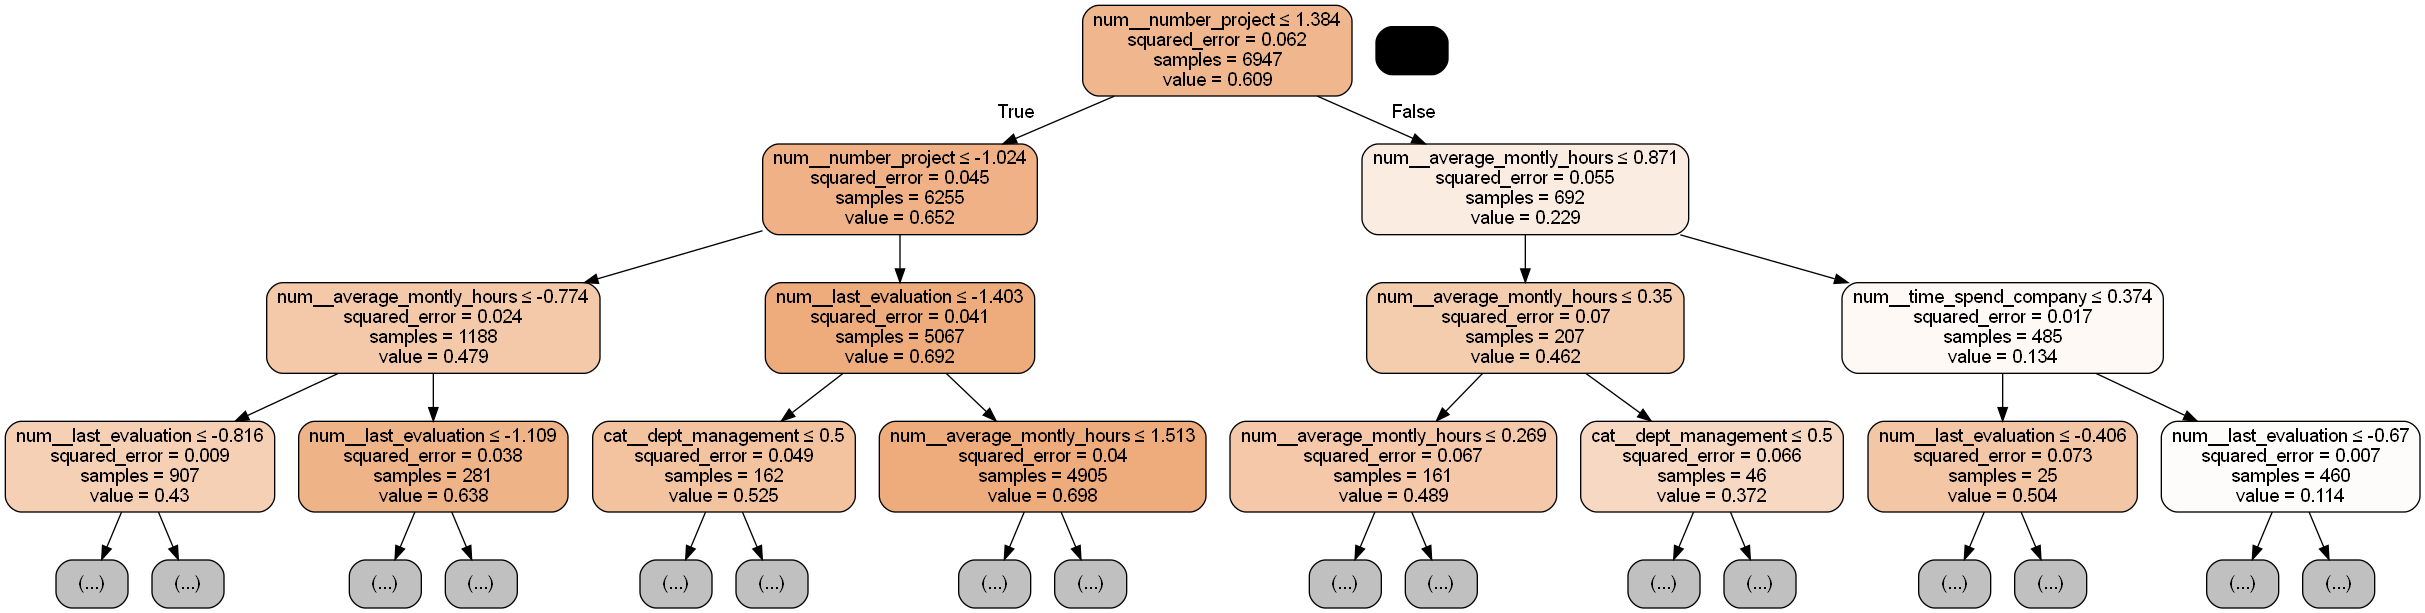

In [7]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

model_RF = model_rf.named_steps['regressor']

# Get feature names from the transformer in the pipeline
transformer = model_rf.named_steps['preprocessor']
feature_names_transformed = transformer.get_feature_names_out()

# Extract single tree
estimator = model_RF.estimators_[0] 

# Export as dot file
dot_data = export_graphviz(estimator, out_file=None, max_depth = 3,
                           feature_names=feature_names_transformed,
                           filled=True, rounded=True, special_characters=True)

# Use pydotplus to convert to PNG
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


<Figure size 1000x600 with 0 Axes>

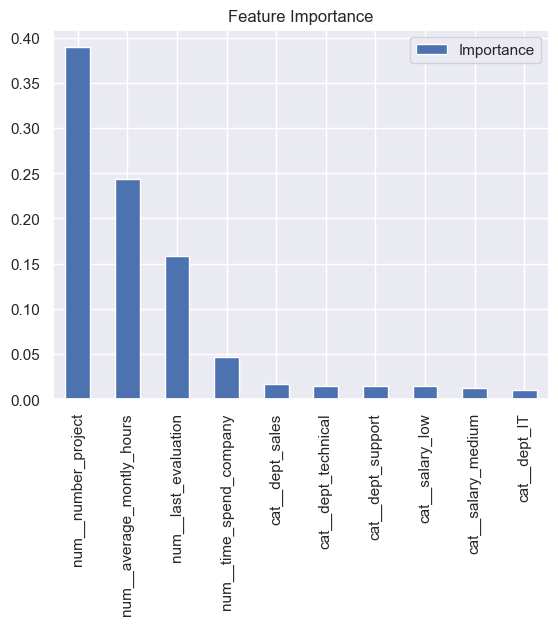

In [8]:
importances = model_RF.feature_importances_

feature_importances = pd.DataFrame(importances, index=feature_names_transformed, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot ranking of feature importance
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Feature Importance')
plt.show()